In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceuticals_df = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")

# Display the data table for preview
pymaceuticals_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_pymaceuticals_data = pymaceuticals_df.groupby(["Drug", "Timepoint"])                                                                                     
grouped_mean_tumor_volume = grouped_pymaceuticals_data["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(grouped_mean_tumor_volume).reset_index()

# Preview DataFrame
mean_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_standard_error_tumor_volume = grouped_pymaceuticals_data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
standard_error_tumor_df = pd.DataFrame(grouped_standard_error_tumor_volume)

# Preview DataFrame
standard_error_tumor_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
reframed_mean_df = mean_tumor_df.pivot_table(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
reframed_standard_error_df = standard_error_tumor_df.pivot_table(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
reframed_mean_df
reframed_standard_error_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


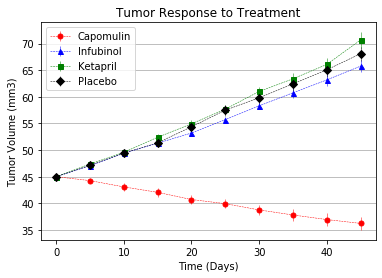

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate the Plot (with Error Bars)
plt.errorbar(reframed_mean_df.index, reframed_mean_df["Capomulin"], yerr=reframed_standard_error_df["Capomulin"],
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5, label="Capomulin")
plt.errorbar(reframed_mean_df.index, reframed_mean_df["Infubinol"], yerr=reframed_standard_error_df["Infubinol"],
             color='blue', marker='^', markersize=5, linestyle='--', linewidth=0.5, label="Infubinol")
plt.errorbar(reframed_mean_df.index, reframed_mean_df["Ketapril"], yerr=reframed_standard_error_df["Ketapril"],
             color='green', marker='s', markersize=5, linestyle='--', linewidth=0.5, label="Ketapril")
plt.errorbar(reframed_mean_df.index, reframed_mean_df["Placebo"], yerr=reframed_standard_error_df["Placebo"],
             color='black', marker='D', markersize=5, linestyle='--', linewidth=0.5, label="Placebo")

# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(loc="upper left")
# gridline
plt.grid(axis="y")
plt.show()

# Save the Figure
plt.savefig('Response to Treatment.png')


In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_mean_metastatic_sites = grouped_pymaceuticals_data["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metastatic_sites_df = pd.DataFrame(grouped_mean_metastatic_sites)

# Preview DataFrame
mean_metastatic_sites_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_standard_error_metastatic_sites = grouped_pymaceuticals_data["Metastatic Sites"].sem()

# Convert to DataFrame
standard_error_metastatic_sites_df = pd.DataFrame(grouped_standard_error_metastatic_sites)

# Preview DataFrame
standard_error_metastatic_sites_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
reframed_mean_metastatic_sites_df = mean_metastatic_sites_df.pivot_table(index="Timepoint",columns="Drug",values="Metastatic Sites")
reframed_standard_error_metastatic_sites_df = standard_error_metastatic_sites_df.pivot_table(index="Timepoint",columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
reframed_mean_metastatic_sites_df
reframed_standard_error_metastatic_sites_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


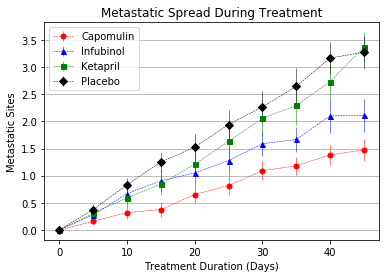

In [21]:
# Generate the Plot (with Error Bars)
plt.errorbar(reframed_mean_metastatic_sites_df.index, reframed_mean_metastatic_sites_df["Capomulin"], 
             yerr=reframed_standard_error_metastatic_sites_df["Capomulin"],
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5, label="Capomulin")
plt.errorbar(reframed_mean_metastatic_sites_df.index, reframed_mean_metastatic_sites_df["Infubinol"], 
             yerr=reframed_standard_error_metastatic_sites_df["Infubinol"],
             color='blue', marker='^', markersize=5, linestyle='--', linewidth=0.5, label="Infubinol")
plt.errorbar(reframed_mean_metastatic_sites_df.index, reframed_mean_metastatic_sites_df["Ketapril"], 
             yerr=reframed_standard_error_metastatic_sites_df["Ketapril"],
             color='green', marker='s', markersize=5, linestyle='--', linewidth=0.5, label="Ketapril")
plt.errorbar(reframed_mean_metastatic_sites_df.index, reframed_mean_metastatic_sites_df["Placebo"], 
             yerr=reframed_standard_error_metastatic_sites_df["Placebo"],
             color='black', marker='D', markersize=5, linestyle='--', linewidth=0.5, label="Placebo")

# Chart title
plt.title("Metastatic Spread During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Metastatic Sites")
# legend 
plt.legend(loc="upper left")
# gridline
plt.grid(axis="y")

# Save the Figure
plt.savefig('Metastatic Spread.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate_df = pymaceuticals_df[["Drug", "Timepoint", "Mouse ID"]]
mouse_count = survival_rate_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
mouse_counts_df = pd.DataFrame(mouse_count)
renamed_mouse_count_df = mouse_counts_df.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
renamed_mouse_count_df

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_df = renamed_mouse_count_df.pivot_table(index="Timepoint",columns="Drug",values="Mouse Count")

# Preview the Data Frame
survival_rate_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


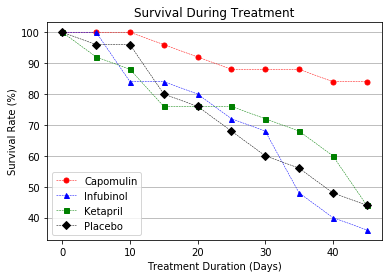

In [16]:
# Generate the Plot (Accounting for percentages)
percent_survival_rate = (survival_rate_df / survival_rate_df.iloc[0])  * 100
percent_survival_rate

plt.plot(percent_survival_rate.index, percent_survival_rate["Capomulin"], 
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5, label="Capomulin")
plt.plot(percent_survival_rate.index, percent_survival_rate["Infubinol"], 
             color='blue', marker='^', markersize=5, linestyle='--', linewidth=0.5, label="Infubinol")
plt.plot(percent_survival_rate.index, percent_survival_rate["Ketapril"], 
             color='green', marker='s', markersize=5, linestyle='--', linewidth=0.5, label="Ketapril")
plt.plot(percent_survival_rate.index, percent_survival_rate["Placebo"], 
             color='black', marker='D', markersize=5, linestyle='--', linewidth=0.5, label="Placebo")

# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Survival Rate (%)")
# legend 
plt.legend(loc="bottom left")
# gridline
plt.grid(axis="y")


# Save the Figure
plt.savefig('Survival Rate.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
tumor_volume_percent_change = ((reframed_mean_df.iloc[9] - reframed_mean_df.iloc[0]) / reframed_mean_df.iloc[0]) * 100

# Display the data to confirm
tumor_volume_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

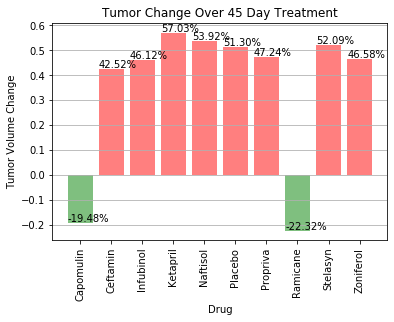

<Figure size 432x288 with 0 Axes>

In [20]:
# Store all Relevant Percent Changes into a Tuple
drug_list = tumor_volume_percent_change.index
tumor_percent_change_list = tumor_volume_percent_change.values


drug_list_df = pd.DataFrame({"Drug": drug_list, 
                             "Tumor Volume % Change": tumor_percent_change_list})
drug_list_df


# Splice the data between passing and failing drugs
result_color = []
for drug in drug_list_df["Tumor Volume % Change"]:
    if drug > 0:
        result_color.append("r")
    else:
        result_color.append("g")

# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(len(drug_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_list, rotation=90)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("Tumor Volume Change")
plt.grid(axis="y")
chart = plt.bar(x_axis, tumor_percent_change_list / 100, color=result_color, alpha=0.5, align="center")

# Use functions to label the percentages of changes
for i in chart:
    yvalue = i.get_height()
    plt.text(i.get_x(), yvalue + 0.005, "{:.2%}".format(yvalue))
    
plt.show()


# Save the Figure
plt.savefig('Tumor Volume Change.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)